<a href="https://colab.research.google.com/github/deepak-kannan7/Restaurant-Review-Classifier-NLP/blob/main/NLPModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("TestReviews.tsv",delimiter='\t',quoting=3)

In [3]:
df.shape

(100, 1)

In [4]:
df.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


In [5]:
#Data Cleaning

import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
test_data=[]

for i in range(0, 100):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  test_data.append(review)

In [7]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='BagofWords.pkl'
cv = pickle.load(open(cvFile, "rb"))

In [8]:
X_fresh = cv.transform(test_data).toarray()
X_fresh.shape

(100, 501)

In [9]:
import joblib
classifier = joblib.load('NB_Classifier')

In [10]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [12]:
df['prediction'] = y_pred.tolist()
df.head()

,Review,prediction
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",0
4,-My order was not correct.,0


In [13]:
#Exporting the data in a csv file

df.to_csv("Predicted_Sentiments.csv", sep='\t', encoding='UTF-8', index=False)

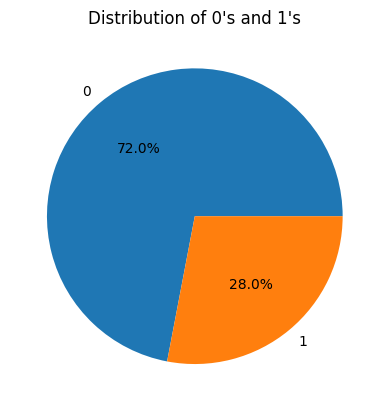

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

filename = 'Predicted_Sentiments.csv'
field_name = 'prediction'

df = pd.read_csv(filename,delimiter='\t',quoting=3)

value_counts = df[field_name].value_counts()

labels = value_counts.index.astype(str)
counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of 0's and 1's")
plt.show()